# IND320 - Assignment 1

Name: Eskil Torp Skogsholm 

GitHub link: https://github.com/esksko/IND320-assignments-esksko

Streamlit app: https://ind320-esksko.streamlit.app/


## AI usage

During development of this assignment, I utilized AI tools to assist me. 
I used GitHub copilot for code completion, and ChatGPT/Claude for explanations and some code snippets.
This helped me with getting back into how pandas and matplotlib work, as I haven't used them in a while.
For the final plot, I explained how I wanted my plot to look as input, and used AI to figure out how to set it up  with shared axes and correct formatting.

## Log

First, I installed Git on my computer and set everything up with a new SSH key for the computer I am using. I have some previous experience using Gitlab, so setting up a GitHub repository went smoothly. I made sure to include a .gitignore file so that unnecessary and private files (passwords, API keys, etc.) weren’t included in the repository.

After that, I started work on the Jupyter Notebook part of the assignment. Reading the data using pandas and printing the first 5 rows of the DataFrame to get an overview of its structure. Plotting the columns separately was quite simple. Firstly, I tried to just plot the data without any preprocessing and seeing the result. Plotting a bar/data point for every single entry in the DataFrame looked messy, so I decided to use the mean values for each month for this plotting (except temperature, where I used the daily average). I decided to use a line plot for the temperature, a polar plot for wind direction, and bar plots for precipitation, wind speed and wind gusts. The only plot I hadn’t used before was the polar plot, so I used AI to understand how I could set it up. 

Plotting all the columns together was more difficult. After some thinking, I figured out that I wanted 2 subplots next to each other. One with the temperature, precipitation, wind speed and wind gusts, and one with the wind direction. Due to the different categories of data having different scales, I decided to use multiple axes. Here, AI was especially useful. I explained how I wanted the plot to look, and got an outline of how I could achieve it using matplotlib. When I understood how the twinx() function worked, it just became a matter of plotting the right data corresponding to its relevant axis and some formatting to make it look decent.
Getting the Streamlit app up and running was also quite easy due to the integration with GitHub. Streamlit automatically creates a navigation bar when you structure the app with a “pages” folder, so I didn’t have to manually create one. Showing the DataFrame was very easy, the row-wise LineChartColumn() was a little bit more complicated and took some reading of the documentation to achieve. On page 3 (the plots page), getting the month- and data selection to work, was intuitive.  

In the future, I would like to clean up and make the code more readable. 


## Task - Jupyter Notebook


In [10]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Reading weather data and printing the first few rows to see its structure
df = pd.read_csv("../data/open-meteo-subset.csv")

# Converting "time" column to datetime format 
df["time"] = pd.to_datetime(df["time"])

# Print dataset info
print("\nDataset Info:")
print(df.info())

df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   time                    8760 non-null   datetime64[ns]
 1   temperature_2m (°C)     8760 non-null   float64       
 2   precipitation (mm)      8760 non-null   float64       
 3   wind_speed_10m (m/s)    8760 non-null   float64       
 4   wind_gusts_10m (m/s)    8760 non-null   float64       
 5   wind_direction_10m (°)  8760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 410.8 KB
None


,time,temperature_2m (°C),precipitation (mm),wind_speed_10m (m/s),wind_gusts_10m (m/s),wind_direction_10m (°)
0,2020-01-01 00:00:00,-2.2,0.1,9.6,21.3,284
1,2020-01-01 01:00:00,-2.2,0.0,10.6,23.0,282
2,2020-01-01 02:00:00,-2.3,0.0,11.0,23.5,284
3,2020-01-01 03:00:00,-2.3,0.0,10.6,23.3,284
4,2020-01-01 04:00:00,-2.7,0.0,10.6,22.8,284


In [12]:
# Ensure time is index
df = df.set_index("time")

# Daily mean temperature
daily_mean_temp = df["temperature_2m (°C)"].resample("D").mean().to_frame().reset_index()

# Monthly mean temperature
monthly_mean_temp = df["temperature_2m (°C)"].resample("M").mean().to_frame().reset_index()

# Monthly total precipitation
monthly_precip = df["precipitation (mm)"].resample("M").sum().to_frame().reset_index()

# Daily mean wind speed
monthly_mean_wind = df["wind_speed_10m (m/s)"].resample("M").mean().to_frame().reset_index()

# Monthly average wind gusts
monthly_mean_wind_gusts = df["wind_gusts_10m (m/s)"].resample("M").mean().to_frame().reset_index()

C:\Users\esksk\AppData\Local\Temp\ipykernel_24396\1086823445.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_temp = df["temperature_2m (°C)"].resample("M").mean().to_frame().reset_index()
C:\Users\esksk\AppData\Local\Temp\ipykernel_24396\1086823445.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_precip = df["precipitation (mm)"].resample("M").sum().to_frame().reset_index()
C:\Users\esksk\AppData\Local\Temp\ipykernel_24396\1086823445.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_wind = df["wind_speed_10m (m/s)"].resample("M").mean().to_frame().reset_index()
C:\Users\esksk\AppData\Local\Temp\ipykernel_24396\1086823445.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean_wind_gusts = df["wind_gusts_10m (m/s)"].

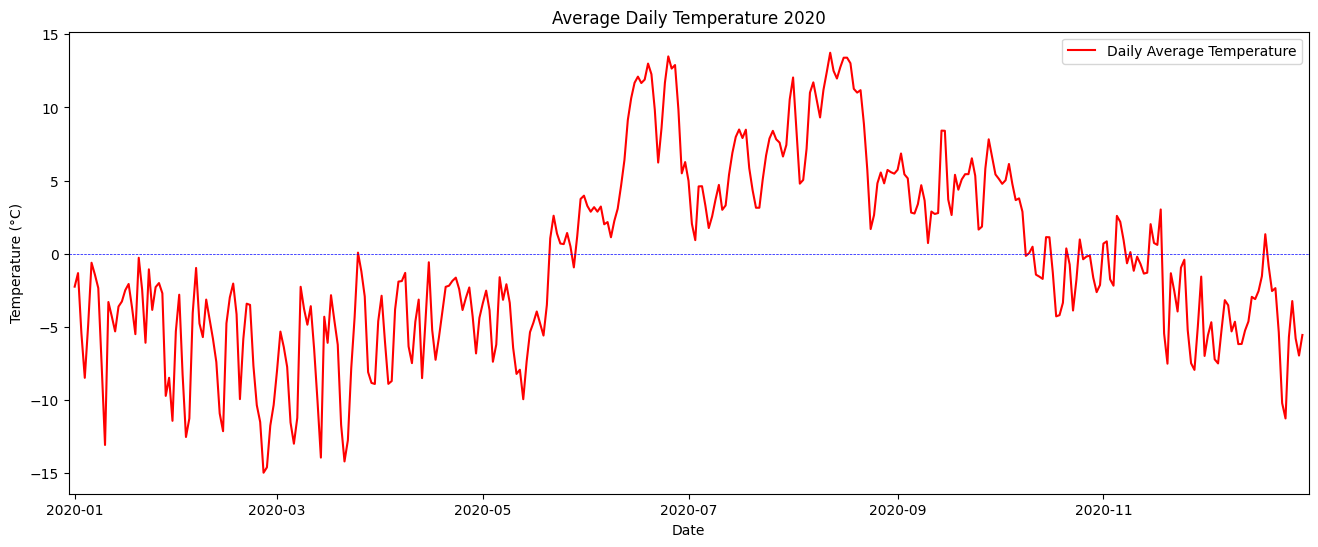

In [13]:
# Plotting temperature_2m (°C)
plt.figure(figsize=(16, 6)) 

#sns.scatterplot(data=daily_mean_temp, x="time", y="temperature_2m (°C)", hue="temperature_2m (°C)", palette="flare", legend=None, alpha=1, label="Hourly Temperature", s=8)
sns.lineplot(data=daily_mean_temp, x="time", y="temperature_2m (°C)", color="red", label="Daily Average Temperature")
plt.title("Average Daily Temperature 2020")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.margins(x=0.005)
plt.axhline(0, color='blue', linestyle='--', linewidth=0.5)


C:\Users\esksk\AppData\Local\Temp\ipykernel_24396\684735767.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()  # remove legend for cleaner look


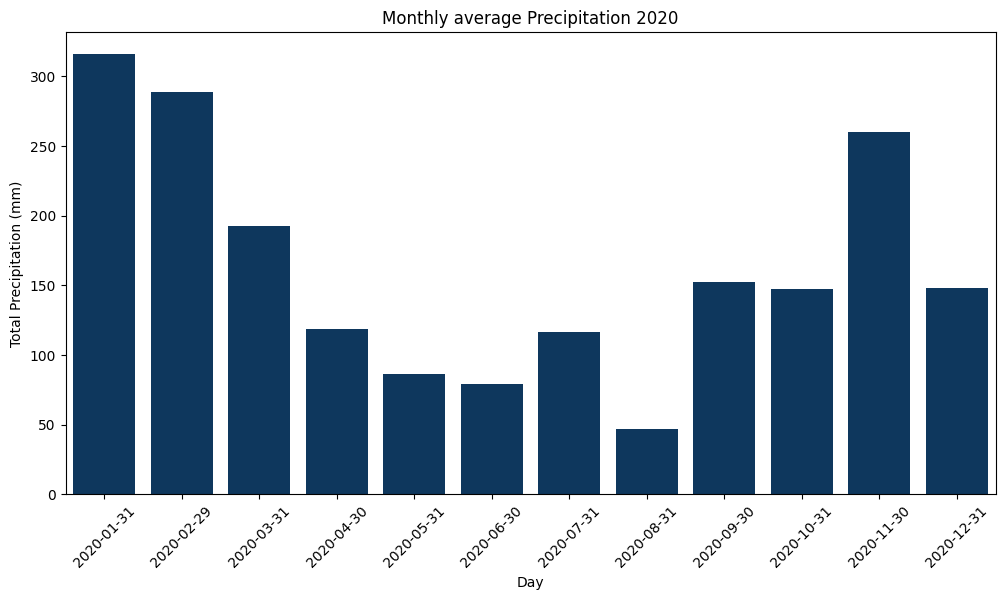

In [14]:
# Plotting precipitation (mm)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_precip,
    x="time",
    y="precipitation (mm)",
    color="#01386a"
)

# Adding titles and labels
plt.title("Monthly average Precipitation 2020")
plt.xlabel("Day")
plt.ylabel("Total Precipitation (mm)")
plt.xticks(rotation=45)  # rotate labels for readability
plt.legend().remove()  # remove legend for cleaner look



C:\Users\esksk\AppData\Local\Temp\ipykernel_24396\1498973434.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


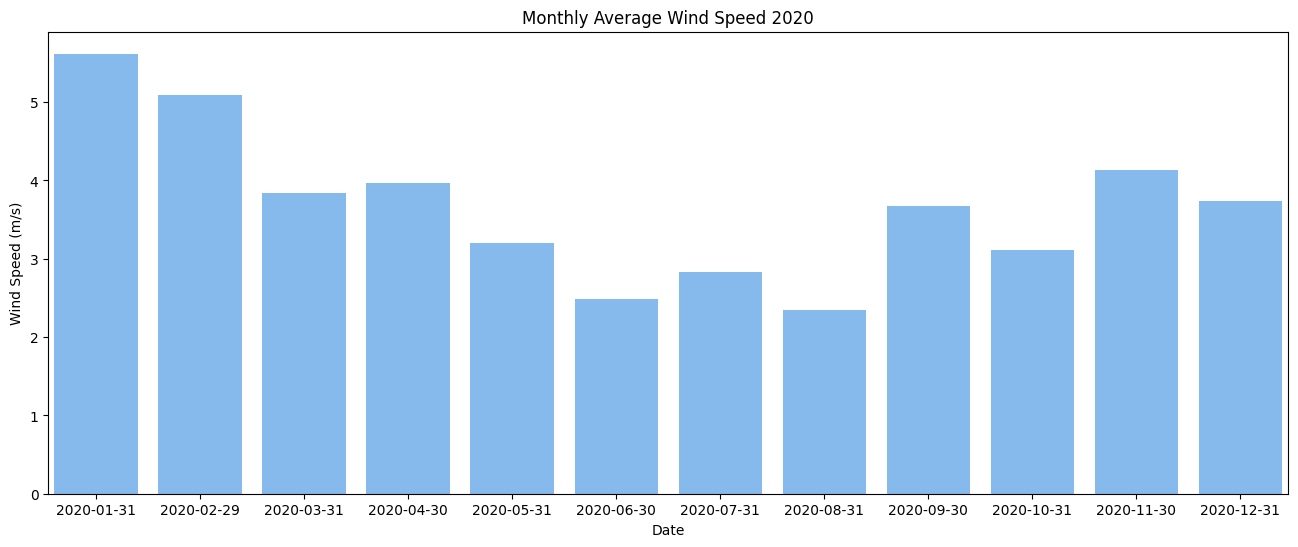

In [15]:
# Plotting wind_speed_10m (m/s)
# Plotting average wind speed for each month
plt.figure(figsize=(16, 6)) 
sns.barplot(data=monthly_mean_wind, x="time", y="wind_speed_10m (m/s)", color="#75bbfd")
plt.title("Monthly Average Wind Speed 2020")
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")
plt.margins(x=0.005)
plt.legend().remove()


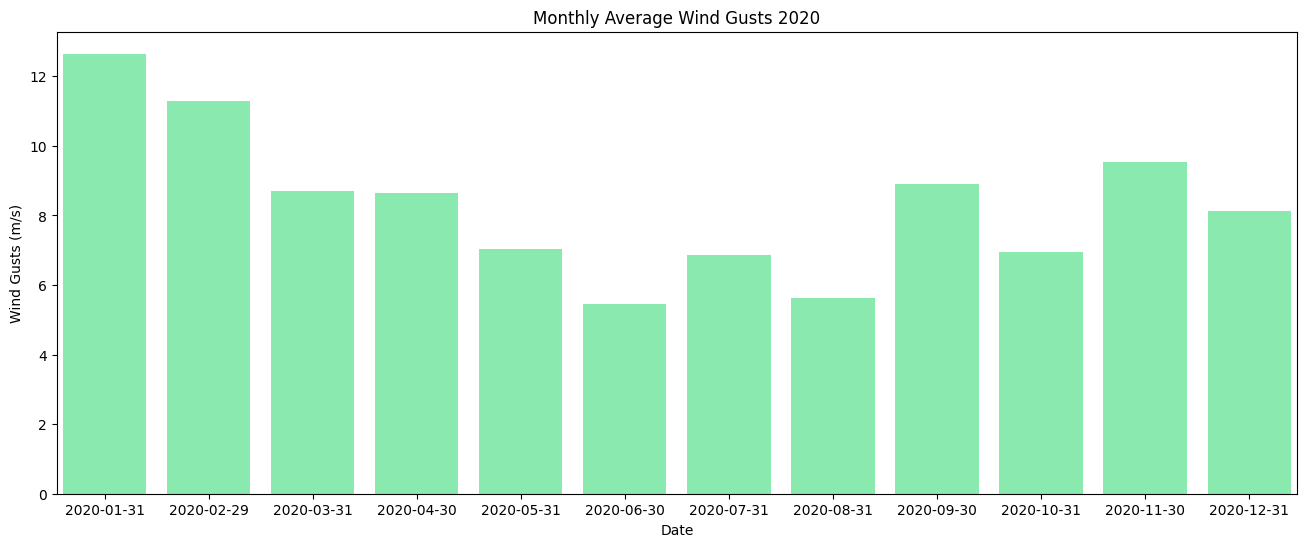

In [16]:
# Plotting wind_gusts_10m (m/s)
# Average wind gusts for each month
plt.figure(figsize=(16, 6))

#sns.lineplot(data=daily_max_wind_gusts, x="time", y="wind_gusts_10m (m/s)", color="orange", label="Hourly Wind Gusts")
sns.barplot(data=monthly_mean_wind_gusts, x="time", y="wind_gusts_10m (m/s)", color="#7af9ab")
plt.title("Monthly Average Wind Gusts 2020")
plt.xlabel("Date")
plt.ylabel("Wind Gusts (m/s)")
plt.margins(x=0.005)


Text(0.5, 0, 'Wind Direction (°)')

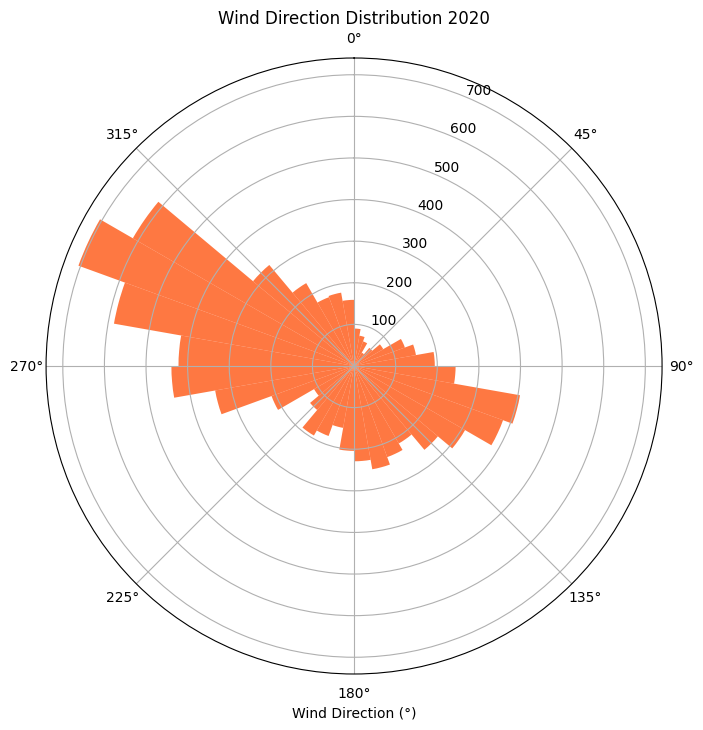

In [17]:
# Plotting wind_direction_10m (°) using a polar plot
# This shows the count of occurrences for each wind direction in degrees over the year

# Convert wind direction from degrees to radians for polar plot
angles = np.deg2rad(df["wind_direction_10m (°)"])


plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.hist(angles, bins=36, color="#fe4b03", alpha=0.75)
# Setting the direction of 0 degrees to the top (North) and making the plot clockwise
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_title("Wind Direction Distribution 2020")
ax.set_xlabel("Wind Direction (°)")

Text(0.5, 0, 'Wind Direction (°)')

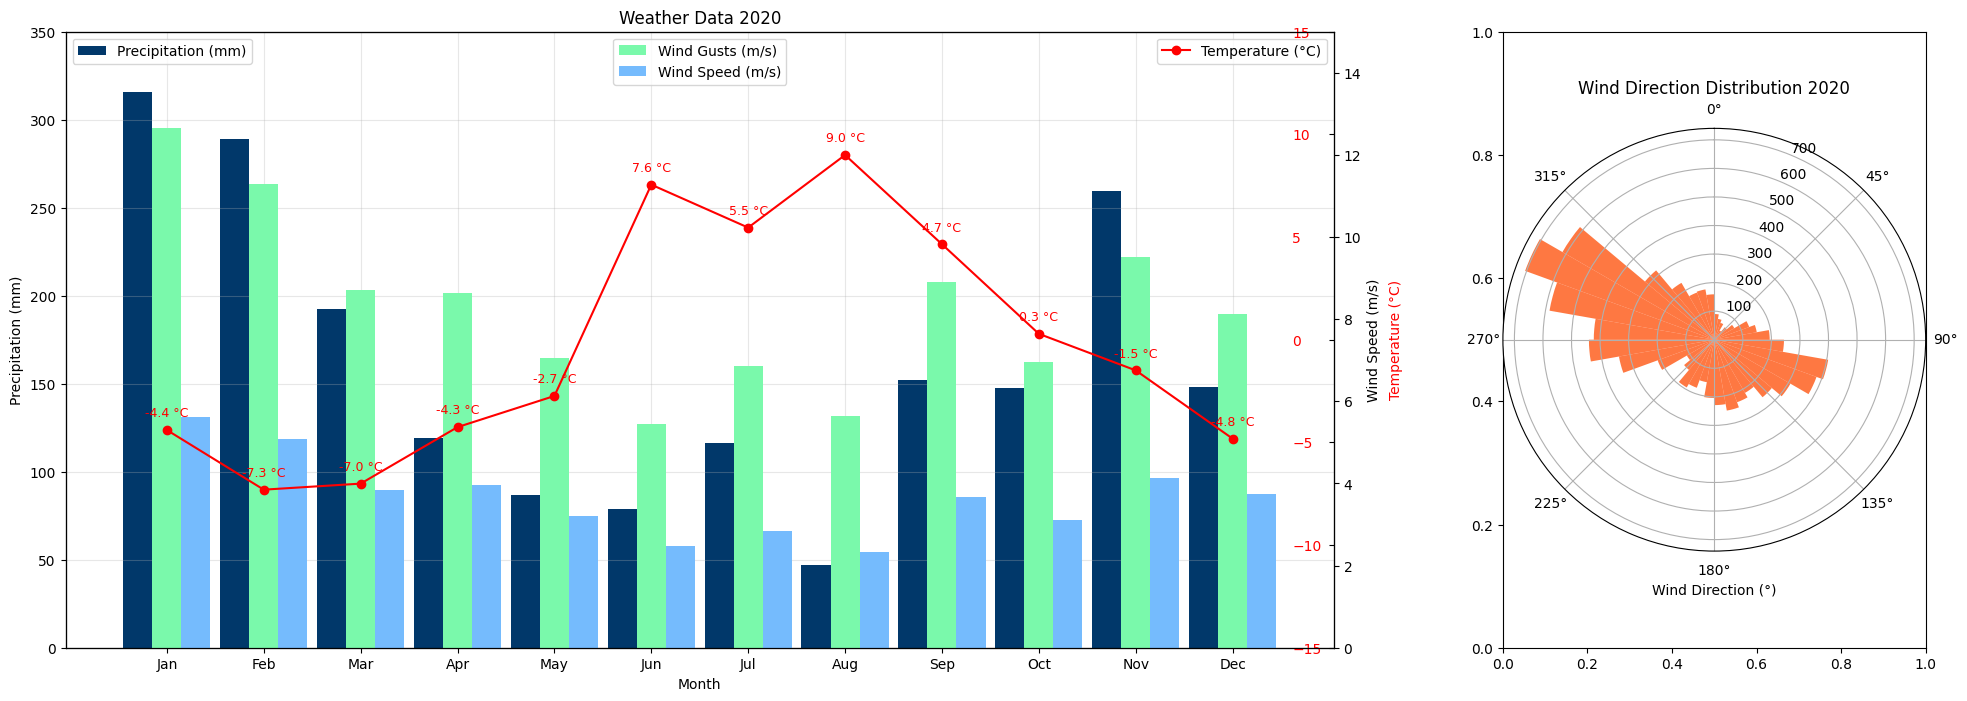

In [18]:
# Prepare monthly data as DataFrame for combined plotting
monthly_data = pd.DataFrame({
    "month": monthly_precip["time"].dt.strftime("%b"),
    "Precipitation (mm)": monthly_precip["precipitation (mm)"].values,
    "Wind Speed (m/s)": monthly_mean_wind["wind_speed_10m (m/s)"].values,
    "Wind Gusts (m/s)": monthly_mean_wind_gusts["wind_gusts_10m (m/s)"].values,
    "Temperature (°C)": monthly_mean_temp["temperature_2m (°C)"].values
})


month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# X positions - bar width and offsets for grouped bars
x = np.arange(len(month_order))
bar_width = 0.3
offset = bar_width / 4

# Plot setup
fig, (ax1_precip, ax2) = plt.subplots(1, 2, figsize=(24, 8), gridspec_kw={"width_ratios": [3, 1]})

# This creates two additional y-axes sharing the same x-axis for wind and temperature
ax1_wind = ax1_precip.twinx()
ax1_temp = ax1_precip.twinx()

# Formatting the ax labels, positions and colors
ax1_precip.set_ylabel("Precipitation (mm)")
ax1_wind.set_ylabel("Wind Speed (m/s)")
ax1_temp.tick_params(axis="y", labelcolor="red", direction="in", pad=-30)
ax1_temp.set_ylabel("Temperature (°C)", color="red", labelpad=40, )

# Plotting the data with regards to their respective axes
ax1_precip.bar(x - bar_width, monthly_data["Precipitation (mm)"], width=bar_width, color="#01386a", label="Precipitation (mm)")
ax1_wind.bar(x, monthly_data["Wind Gusts (m/s)"], width=bar_width, color="#7af9ab", label="Wind Gusts (m/s)")
ax1_wind.bar(x + bar_width, monthly_data["Wind Speed (m/s)"], width=bar_width, color="#75bbfd", label="Wind Speed (m/s)")
ax1_temp.plot(x, monthly_data["Temperature (°C)"], color="red", marker="o", label="Temperature (°C)")


# Setting titles, labels, ticks, and legends
ax1_precip.set_xlabel("Month")
ax1_precip.set_title("Weather Data 2020")
ax1_precip.grid(True, alpha=0.3)
ax1_precip.legend(loc="upper left")
ax1_wind.legend(loc="upper center")
ax1_temp.legend(loc="upper right")
ax1_precip.set_xticks(x)
ax1_precip.set_xticklabels(month_order)


# Setting y-limits for better visualization
ax1_precip.set_ylim(0, 350)
ax1_wind.set_ylim(0, 15)
ax1_temp.set_ylim(-15, 15)

# Adding text annotations for temperature points
for xi, yi in zip(x, monthly_data["Temperature (°C)"]):
    ax1_temp.text(xi, yi + 0.5, f"{yi:.1f} °C", color="red", ha="center", va="bottom", fontsize=9)




# Wind direction polar plot
angles = np.deg2rad(df["wind_direction_10m (°)"])
ax2 = plt.subplot(122, polar=True)
ax2.hist(angles, bins=36, color="#fe4b03", alpha=0.75)
ax2.set_theta_zero_location("N")
ax2.set_theta_direction(-1)
ax2.set_title("Wind Direction Distribution 2020")
ax2.set_xlabel("Wind Direction (°)")
